In [11]:
import os

# data_folder = r"g:\SpineUs\VerdureClariusData_0_512"
# segmentation_file_name = "092_Sa_ah_segmentation.npy"

data_folder = r"g:\SpineUs\VerdureClariusData_sc_0_128"
segmentation_file_name = "092_Sa_ah_segmentation.npy"

In [12]:
import numpy as np

segmentation_file = os.path.join(data_folder, segmentation_file_name)

print(f"Loading {segmentation_file}...")

# Load data file as numpy array
data = np.load(segmentation_file)

print(f"Shape of segmentation data: {data.shape}")
print(f"    Value range: {np.min(data)} - {np.max(data)}")
print(f"    Data type: {data.dtype}")

Loading g:\SpineUs\VerdureClariusData_sc_0_128\092_Sa_ah_segmentation.npy...
Shape of segmentation data: (251, 128, 128, 1)
    Value range: 0.0 - 1.0
    Data type: float64


In [14]:
indices_file_name = segmentation_file_name.replace("_segmentation", "_indices")
indices_file = os.path.join(data_folder, indices_file_name)

print(f"Loading {indices_file}...")

try:
    # Load data file as numpy array
    indices = np.load(indices_file)

    print(f"Shape of indices data: {indices.shape}")
    print(f"    Value range: {np.min(indices)} - {np.max(indices)}")
    print(f"    Data type: {indices.dtype}")
except:
    print("No indices file found.")
    indices = None


Loading g:\SpineUs\VerdureClariusData_sc_0_128\092_Sa_ah_indices.npy...
No indices file found.


In [15]:
transform_file_name = segmentation_file_name.replace("_segmentation", "_transform")
transform_file = os.path.join(data_folder, transform_file_name)

print(f"Loading {transform_file}...")
transform = np.load(transform_file)

print(f"Shape of transform data: {transform.shape}")
print(f"    Data type: {transform.dtype}")

Loading g:\SpineUs\VerdureClariusData_sc_0_128\092_Sa_ah_transform.npy...
Shape of transform data: (251, 4, 4)
    Data type: float64


In [16]:
ultrasound_file_name = segmentation_file_name.replace("_segmentation", "_ultrasound")
ultrasound_file = os.path.join(data_folder, ultrasound_file_name)
ultrasound = np.load(ultrasound_file)

print(f"Shape of ultrasound data: {ultrasound.shape}")
print(f"    Value range: {np.min(ultrasound)} - {np.max(ultrasound)}")
print(f"    Data type: {ultrasound.dtype}")

Shape of ultrasound data: (251, 128, 128, 1)
    Value range: 0.0 - 255.0
    Data type: float64


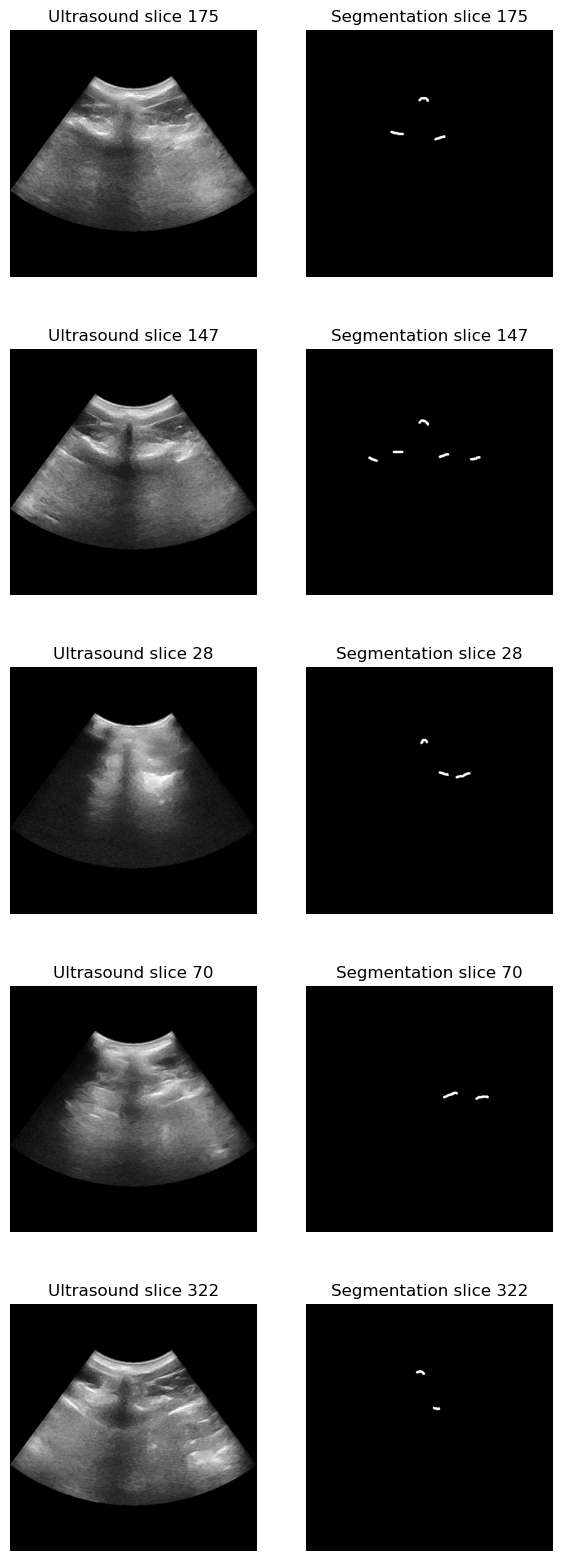

In [19]:
# Show five random slices of ultrasound and segmentation data side by side. Only pick slices whose indices are in the indices file, if there are indices.

import random
import matplotlib.pyplot as plt

num_random_slices = 5

# Pick random slice numbers from the indices or all the images
if indices is None:
    random_slices = random.sample(range(ultrasound.shape[0]), num_random_slices)
else:
    random_slices = random.sample(list(indices), num_random_slices)

# Create a figure with num_random_slices rows and 2 columns
fig, axes = plt.subplots(num_random_slices, 2, figsize=(7, num_random_slices * 4))

# Loop over all slices
for i, slice_index in enumerate(random_slices):
    # Get the ultrasound and segmentation data for the slice
    ultrasound_slice = ultrasound[slice_index, :, :, 0]
    segmentation_slice = data[slice_index, :, :]

    # Plot the ultrasound data
    axes[i, 0].imshow(ultrasound_slice, cmap="gray")
    axes[i, 0].set_title(f"Ultrasound slice {slice_index}")
    axes[i, 0].axis("off")


    # Plot the segmentation data
    axes[i, 1].imshow(segmentation_slice, cmap="gray")
    axes[i, 1].set_title(f"Segmentation slice {slice_index}")
    axes[i, 1].axis("off")

plt.show()


Slice index: 539
Shape of ultrasound slice: (512, 512, 1)
Shape of segmentation slice: (512, 512, 1)


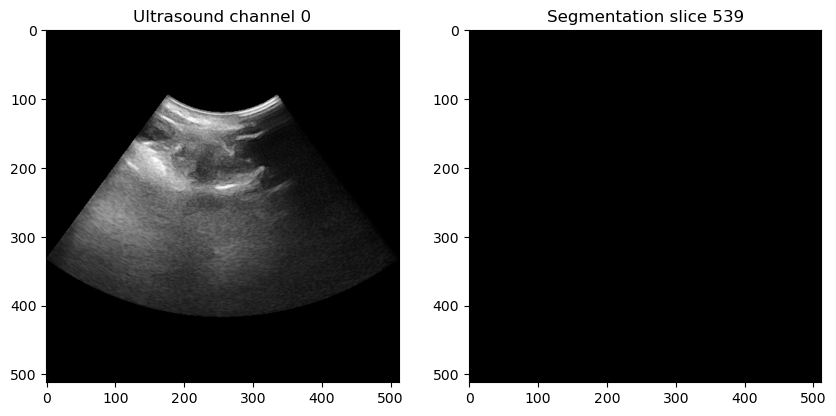

In [20]:
# Show one random slice of ultrasound and segmentation data side by side. Show all channels of ultrasound image as separate images.

import random
import matplotlib.pyplot as plt

# Pick one random slice
slice_index = random.randint(0, data.shape[0])
print(f"Slice index: {slice_index}")

# Get the ultrasound and segmentation data for the slice
ultrasound_slice = ultrasound[slice_index, :, :, :]
segmentation_slice = data[slice_index, :, :]
print(f"Shape of ultrasound slice: {ultrasound_slice.shape}")
print(f"Shape of segmentation slice: {segmentation_slice.shape}")

num_channels = ultrasound_slice.shape[2]

# Create a figure with 1 row and num_channels + 1 columns
fig, axes = plt.subplots(1, num_channels + 1, figsize=(10, 10))

# Plot the ultrasound data
for i in range(num_channels):
    axes[i].imshow(ultrasound_slice[:, :, i], cmap="gray")
    axes[i].set_title(f"Ultrasound channel {i}")

# Plot the segmentation data
axes[num_channels].imshow(segmentation_slice, cmap="gray")
axes[num_channels].set_title(f"Segmentation slice {slice_index}")

plt.show()